#Lecture6. Training Neural Networks I

1. If all the weights are 0, then all neurons will do same operation. Same output, same gradient
-> Initialize weights to small random numbers

In [ ]:
  import numpy as np
  import sys
  

  import matplotlib.pyplot as plt
  %matplotlib inline 

In [ ]:
# assume some unit gaussian 10-D input data
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500] * 10
nonliniearities = ['tanh'] * len(hidden_layer_sizes)

In [ ]:
act = {'relu':lambda x: np.maximum(0, x), 'tanh': lambda x: np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
  X = D if i == 0 else Hs[i-1] # input at this layer
  fan_in = X.shape[1]
  fan_out = hidden_layer_sizes[i]
  W = np.random.randn(fan_in, fan_out) *0.01 # layer initialization
# if we multiply 1.0 instead of 0.01, saturation happens and gradients will be 0
  H = np.dot(X, W) # matrix multiplication
  H = act[nonliniearities[i]](H) #nonlinearity
  Hs[i] = H # cache result on this layer

input layer had mean -0.000362 and std 1.001613
hidden layer 1 had mean 0.000208 and std 0.214362
hidden layer 2 had mean -0.000039 and std 0.047824
hidden layer 3 had mean 0.000006 and std 0.010709
hidden layer 4 had mean -0.000000 and std 0.002389
hidden layer 5 had mean 0.000001 and std 0.000535
hidden layer 6 had mean 0.000000 and std 0.000120
hidden layer 7 had mean -0.000000 and std 0.000027
hidden layer 8 had mean -0.000000 and std 0.000006
hidden layer 9 had mean -0.000000 and std 0.000001
hidden layer 10 had mean 0.000000 and std 0.000000


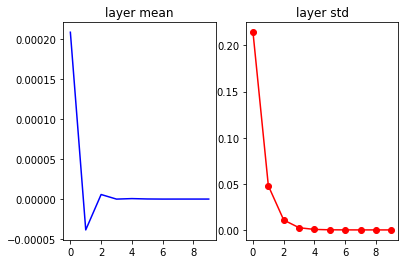

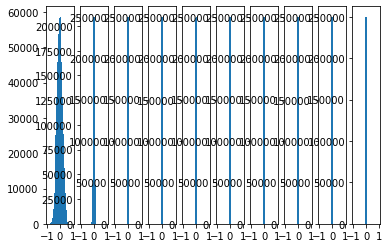

In [ ]:
# look at distributions at each layer
print ('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in iter(Hs.items())]
layer_stds = [np.std(H) for i, H in iter(Hs.items())]
for i, H in iter(Hs.items()):
  print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))

# plot the means and standard deviations
plt.figure()
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'b-')

plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')

# plot the raw distributions
plt.figure()
for i, H in Hs.items():
  plt.subplot(1, len(Hs), i+1)
  plt.hist(H.ravel(), 30, range = (-1, 1))


## Batch Normilization

In [ ]:
def init_two_layer_model(input_size, hidden_size, output_size):
  # initialize a model
  model = {}
  model['W1'] = 0.0001 * np.random.randn(input_size, hidden_size)
  model['b1'] = np.zeros(hidden_size)
  model['W2'] = 0.0001 * np.random.randn(hidden_size, output_size)m

## Optimizer

In [ ]:
# SGD
while True:
  dx = compute_gradient(x)
  x += learning_rate * dx

In [ ]:
# SGD + Momentum (not only considering the direction of gradient, but also considering the velocity)
vx = 0
while True:
  dx = compute_gradient(x)
  vx = rho * x + dx # rho : the friction
  d += learning_rate * vx

In [ ]:
# Nesterov Momentum
dx = compute_gradient(x)
old_v = v
v = rho * v -learning_rate * dx
x += -rho * old_v + (1 + rho) * v

In [ ]:
# AdaGrad
grad_squared = 0
while True:
  dx = compute_gradient(x)
  grad_squered += dx * dx
  x -= learning_rate * dx / (np.sqrt(grad_squared) + 1e-7)

In [ ]:
# RMS Prop
grad_squared = 0
while True:
  dx = compute_gradient(x)
  grad_squared = decay_rate * grad_squared + (1 - decay_rate) * dx * dx
  x -= learning_rate * dx / (np.sqrt(grad_squared) + 1e-7)

In [ ]:
# Adam
first_moment = 0
second_moment = 0 
while True:
  dx = compute_gradient(x)
  # like Momentum
  first_moment = beta1 * first_moment + (1 - beta1) * dx
  # like AdaGrad / RMSProp
  second_moment = beta2 * second_moment + (1 - beta2) * dx * dx
  # bias correction
  first_unbias = first_moment / (1 - beta1 ** t)
  second_unbias = second_moment / (1 - beta2 ** t)
  # like AdaGrad / RMSProp
  x -= learning_rate * first_moment / (np.sqrt(second_moment) + 1e-7)

Setting Learning rate decay
1. Try with no decay and see what happens
2. Watch the loss curve and see where you thing you might need decay

## Dropout , a method of regularization
In each forward pass, randomly set som neurons to zero Probability of dropping is a hyperparameter

In [ ]:
# forward pass with a 3-layer network using dropout
p = 0.5 # probability of keeping a unit active. higher = less dropout

def train_step(X):

  # forward pass for example 3-layer neural network
  H1 = np.maximum(0, np.dot(W1, X) + b1)
  U1 = np.random.rand(*H1.shape) < p # first dropout mask
  H1 *= U1 # drop
  H2 = np.maximum(0, np.dot(W2, H1) + b2)
  U2 = np.random.rand(*H2.shape) < p # second dropout mask
  H2 *= U2 # drop
  out = np.dot(W3, H2) + b3 

In [ ]:
def predict(X):
  # ensembled forward pass
  H1 = np.maximum(0, np.dot(W1, X) + b1) * p
  H2 = np.maximum(0, np.dot(W2, H1) + b2) * p
  out = np.dot(W3, H2) + b3

In [ ]:
# Inverted Dropout

p = 0.5 # probability of keeping a unit active. higher = less dropout

def train_step(X):

  # forward pass for example 3-layer neural network
  H1 = np.maximum(0, np.dot(W1, X) + b1)
  U1 = (np.random.rand(*H1.shape) < p) / p # first dropout mask
  H1 *= U1 # drop
  H2 = np.maximum(0, np.dot(W2, H1) + b2)
  U2 = (np.random.rand(*H2.shape) < p) / p # second dropout mask
  H2 *= U2 # drop
  out = np.dot(W3, H2) + b3 

def predict(X):
  # ensembled forward pass
  H1 = np.maximum(0, np.dot(W1, X) + b1) # no scaling necessary
  H2 = np.maximum(0, np.dot(W2, H1) + b2)
  out = np.dot(W3, H2) + b3

Transfer Learning
 : Using pretrained model. 
Just modify final layer to learning one's purpose